<a href="https://colab.research.google.com/github/tianchu-shu/DistinctiveSchools/blob/master/Bullet_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pbpython.com/bullet-graph.html

# Load the data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/'
os.chdir(data_dir)
filename = 'BulletChartData.csv'

df=pd.read_csv(filename)
print("Column headings:")
print(df.columns)

Column headings:
Index(['StudentNumber', 'MatchID', 'StudentName', 'Campus', 'GradeLevel',
       'Homeroom', 'Discipline', 'CoreTeacher', 'Gender', 'DLStatus',
       'ELStatus', 'CurrentEL', 'Race', 'EcDis', 'W20GrowthGoal',
       'W20TargetRIT', 'S20CRGrowthGoal', 'S20CRTargetRIT',
       'S20TypicalGrowthGoal', 'S20TypicalTargetRIT', 'S19RIT', 'S19%ile',
       'F19RIT', 'F19%ile', 'BaselineRIT', 'Baseline Percentile', 'W20RIT',
       'W20%ile', 'W20CGP', 'BtoWChange', 'MetWinterGoal', 'NumberOfAbsences',
       'AbsenceCategory', 'NumberOfDiscipline', 'Disciplinez-Score',
       'DisciplineCategory'],
      dtype='object')


In [0]:
df.drop(df[df.Campus == '3146'].index, inplace=True)

In [0]:
df.drop(df[df.Campus == '3147'].index, inplace=True)

In [15]:
df.tail()

,StudentNumber,MatchID,StudentName,Campus,GradeLevel,Homeroom,Discipline,CoreTeacher,Gender,DLStatus,ELStatus,CurrentEL,Race,EcDis,W20GrowthGoal,W20TargetRIT,S20CRGrowthGoal,S20CRTargetRIT,S20TypicalGrowthGoal,S20TypicalTargetRIT,S19RIT,S19%ile,F19RIT,F19%ile,BaselineRIT,Baseline Percentile,W20RIT,W20%ile,W20CGP,BtoWChange,MetWinterGoal,NumberOfAbsences,AbsenceCategory,NumberOfDiscipline,Disciplinez-Score,DisciplineCategory
5917,60040610,60040610.0,"Wilson, Asia",Art in Motion,7th,Hicks M,Reading,Drumgoole L,F,No,Not EL,No,BLK,Yes,2.0,227.0,4.0,229.0,3.0,228.0,NaN,NaN,225.0,76.0,225.0,76.0,215.0,46.0,2.0,-10.0,0.0,4.0,Strong Attendance,3,-0.336406,Fewer Incidents than Peers
5918,50263275,50263275.0,"Woods, Collin",Art in Motion,8th,Hudson A,Reading,Brinkman K,M,No,Not EL,No,BLK,Yes,1.0,234.0,2.0,235.0,2.0,235.0,233.0,NaN,231.0,27.0,233.0,27.0,237.0,88.0,84.0,4.0,1.0,8.0,Attednance Risk,3,-0.336406,Fewer Incidents than Peers
5919,50283392,50283392.0,"Woods, Zaria",Art in Motion,7th,Keys V,Reading,Drumgoole L,F,No,Not EL,No,BLK,Yes,3.0,219.0,5.0,221.0,4.0,220.0,216.0,NaN,204.0,26.0,216.0,26.0,197.0,10.0,3.0,-19.0,0.0,0.0,Perfect Attendance,0,-0.696840,Fewer Incidents than Peers
5920,60043855,60043855.0,"Wright, Dariyon",Art in Motion,7th,Drumgoole L,Reading,Drumgoole L,M,No,Not EL,No,BLK,Yes,3.0,220.0,5.0,222.0,4.0,221.0,NaN,NaN,217.0,58.0,217.0,58.0,230.0,82.0,98.0,13.0,1.0,2.0,Strong Attendance,0,-0.696840,Fewer Incidents than Peers
5921,50067381,50067381.0,"Young, Ahmadiya",Art in Motion,7th,Keys V,Reading,Drumgoole L,F,No,Not EL,No,BLK,Yes,2.0,228.0,3.0,229.0,2.0,228.0,226.0,76.0,NaN,NaN,226.0,76.0,224.0,69.0,NaN,-2.0,0.0,1.0,Strong Attendance,0,-0.696840,Fewer Incidents than Peers


In [0]:
keep = ['W20RIT','S20CRTargetRIT','F19RIT','W20TargetRIT','S20TypicalTargetRIT']

In [17]:
df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Art in Motion,Mathematics,218.6,230.0,216.5,225.6,225.9
1,Art in Motion,Reading,215.6,222.6,215.7,220.0,220.6
2,Bucktown,Mathematics,202.4,215.6,192.7,209.5,211.9
3,Bucktown,Reading,195.8,206.9,187.8,202.2,204.8
4,Irving Park,Mathematics,200.3,211.1,194.9,204.6,207.5
5,Irving Park,Reading,195.9,203.2,190.9,197.9,201.1
6,Prairie,Mathematics,201.7,211.8,194.3,205.4,207.6
7,Prairie,Reading,195.2,201.6,188.5,196.1,198.9
8,West Belden,Mathematics,201.9,215.8,193.8,209.9,212.2
9,West Belden,Reading,196.3,206.5,189.6,201.8,204.4


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np

%matplotlib inline

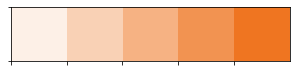

In [18]:
#reading
sns.palplot(sns.light_palette('#ef7521', 5))


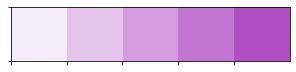

In [19]:
#math
sns.palplot(sns.light_palette('#b24ec4', 5))

# Total Average for Distinctive Schools

In [20]:
#Total math and reading mean for Distinctive Schools
total = df.groupby(["Discipline"], as_index=False)[keep].mean().round(1)
total

,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Mathematics,203.0,215.2,195.7,209.1,211.4
1,Reading,197.5,206.4,191.4,201.6,204.2


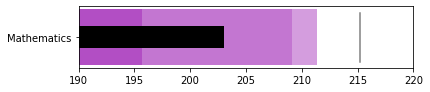

In [25]:
limits = [195.7, 209.1, 211.4]
data_to_plot = ("Mathematics", 203, 215.2)
palette = sns.light_palette('#b24ec4', 5, reverse=True)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(190, 220)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=5, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

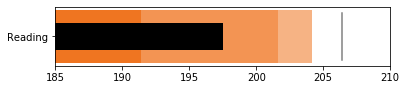

In [26]:
limits = [191.4, 201.6, 204.2]
data_to_plot = ("Reading", 197.5, 206.4)
palette = sns.light_palette('#ef7521', 5, reverse=True)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_xlim(185, 210)
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=4, color=palette[idx])
    prev_limit = lim

# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=2)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

In [0]:
#adding as_index=False to make the groupby output into a dataframe
schools = df.groupby(['Campus',"Discipline"], as_index=False)[keep].mean().round(1)

In [0]:
schools= schools.dropna()

In [29]:
schools.tail()

,Campus,Discipline,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
5,Irving Park,Reading,195.9,203.2,190.9,197.9,201.1
6,Prairie,Mathematics,201.7,211.8,194.3,205.4,207.6
7,Prairie,Reading,195.2,201.6,188.5,196.1,198.9
8,West Belden,Mathematics,201.9,215.8,193.8,209.9,212.2
9,West Belden,Reading,196.3,206.5,189.6,201.8,204.4


# School Average

In [0]:
math = schools[schools['Discipline']=='Mathematics']
math = math.drop(columns=['Discipline'])

In [31]:
math

,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,Art in Motion,218.6,230.0,216.5,225.6,225.9
2,Bucktown,202.4,215.6,192.7,209.5,211.9
4,Irving Park,200.3,211.1,194.9,204.6,207.5
6,Prairie,201.7,211.8,194.3,205.4,207.6
8,West Belden,201.9,215.8,193.8,209.9,212.2


In [0]:
reading = schools[schools['Discipline']=='Reading']
reading = reading.drop(columns=['Discipline'])

In [0]:
def get_data(df, n=3):
    """ 
    get the data and limits ready for the bullet plot
        Args:
            df = groupbyed dataframe
        Returns:
            a list for text/bar/line
            a list for background color
            floor: a number for the plot min
            ceiling: a number for the plot max

    """
    #Create the text, bar and line
    tbl = df.iloc[:, :n].values.tolist()
    #Create the limits for background color
    bc = df.iloc[:, np.r_[n:n+3]].values.tolist()

    floor = round(df['F19RIT'].min()/5-1)*5
    ceiling = round(df['S20CRTargetRIT'].max()/5)*5

    return tbl, bc, floor, ceiling

In [0]:
import matplotlib.font_manager
csfont = {'fontname':'Calibri'}
def bulletgraph(data=None, limits=None, labels=None, ranges=None, axis_label=None, title=None,
                size=(5, 3), subject= 'Reading', formatter=None, target_color="black", bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            lim = list of xlims 
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            subject = maths or reading
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[0][-1] / 40

    # Use the green palette as a sensible default
    
    if subject =='Reading':
      palette = sns.light_palette('#ef7521', 3, reverse=True)
    else:
      palette = sns.light_palette('#b24ec4', 3, reverse=True)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        #Text for that bar
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.set_xlim(ranges)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits[idx]):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
            rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=20, **csfont)
    fig.subplots_adjust(hspace=0)

In [0]:
t1, l1, f1, c1 = get_data(math)

In [0]:
t1

[['Art in Motion', 218.6, 230.0],
 ['Bucktown', 202.4, 215.6],
 ['Irving Park', 200.3, 211.1],
 ['Prairie', 201.7, 211.8],
 ['West Belden', 201.9, 215.8]]

In [0]:
l1

[[216.5, 225.6, 225.9],
 [192.7, 209.5, 211.9],
 [194.9, 204.6, 207.5],
 [194.3, 205.4, 207.6],
 [193.8, 209.9, 212.2]]

In [0]:
tlr, llr, fr, cl = get_data(reading)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


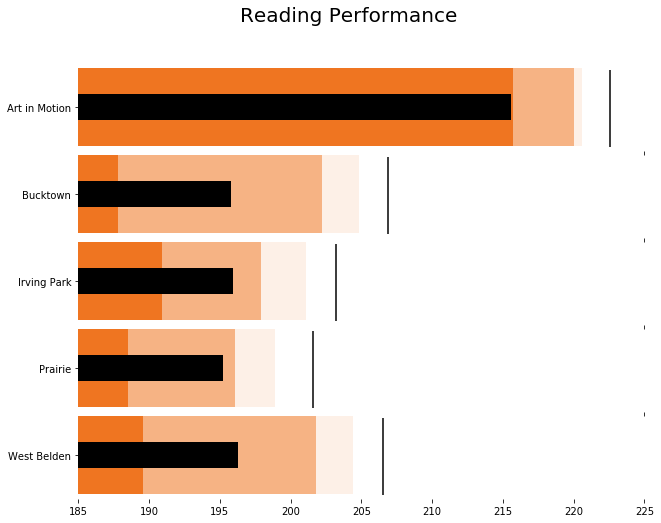

In [37]:
bulletgraph(tlr, llr, ranges =(fr,cl), size=(14,8), subject='Reading', label_color="black", target_color='black',title="Reading Performance")

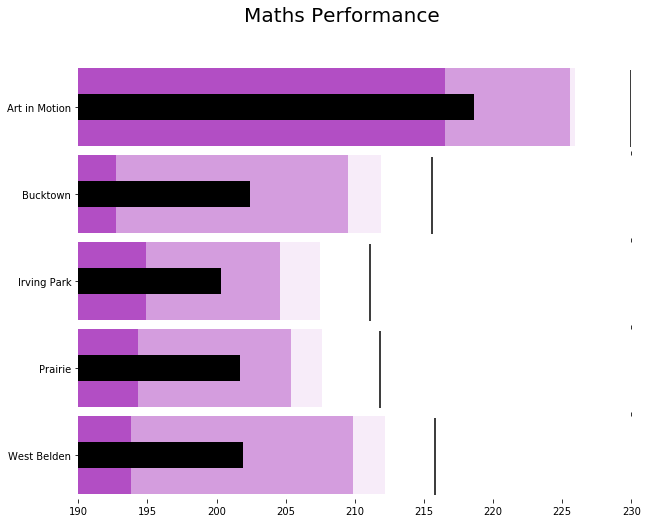

In [38]:
bulletgraph(t1, l1, ranges =(f1,c1), size=(14,8), subject='Math',
            title="Maths Performance")

# By grade level

In [0]:
#adding as_index=False to make the groupby output into a dataframe
grade = df.groupby(['GradeLevel','Campus',"Discipline"], as_index=False)[keep].mean().round(1)
grade= grade.dropna()

In [40]:
gmath = grade[grade['Discipline']=='Mathematics']
gmath = gmath.drop(columns=['Discipline'])
gmath.head()

,GradeLevel,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
0,1st,Bucktown,176.2,190.7,163.6,181.1,187.7
2,1st,Irving Park,172.4,185.2,163.9,174.6,182.1
4,1st,Prairie,180.0,192.4,169.0,183.1,189.1
6,1st,West Belden,175.6,188.4,161.4,178.4,185.0
8,2nd,Bucktown,191.0,207.1,180.1,201.5,202.9


In [41]:
gread = grade[grade['Discipline']=='Reading']
gread = gread.drop(columns=['Discipline'])
gread.head()

,GradeLevel,Campus,W20RIT,S20CRTargetRIT,F19RIT,W20TargetRIT,S20TypicalTargetRIT
1,1st,Bucktown,171.1,184.6,161.0,175.7,182.3
3,1st,Irving Park,169.9,178.3,160.7,168.4,175.8
5,1st,Prairie,172.3,184.4,160.6,175.5,181.5
7,1st,West Belden,170.6,183.0,157.8,173.9,180.1
9,2nd,Bucktown,184.0,199.5,173.6,194.5,196.6


In [0]:
 def slice_data(df, sub='Reading'):
    '''
    get the data and limits ready for the bullet plot
        Args:
            df = groupbyed dataframe
        Returns:
            a list for text/bar/line
            a list for background color
            floor: a number for the plot min
            ceiling: a number for the plot max

    '''
    #Create the text, bar and line
    for grade in list(df.GradeLevel.unique()):
        mni = df.loc[df['GradeLevel'] == grade]
        mni = mni.drop(columns=['GradeLevel'])
        tl, ll, fr, cl = get_data(mni, n=3)
        bulletgraph(tl, ll, ranges =(fr,cl), size=(14,8), subject=sub,title=grade+" Grade "+ sub+" Performance")

    return 

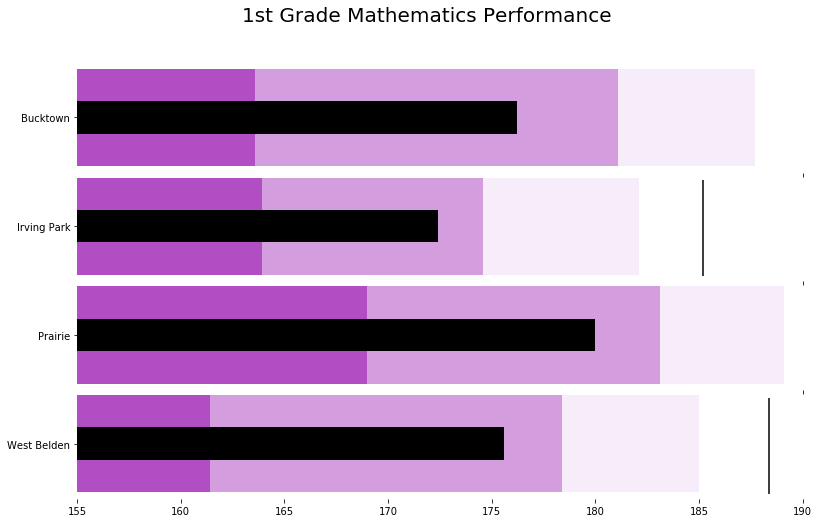

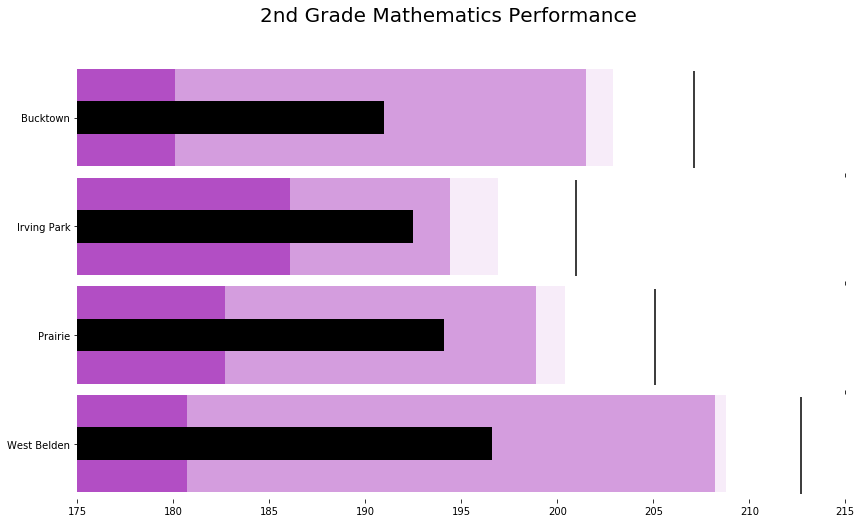

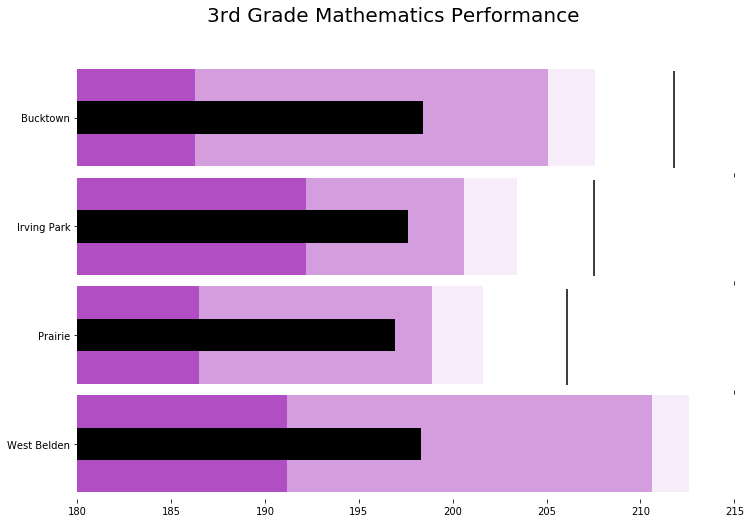

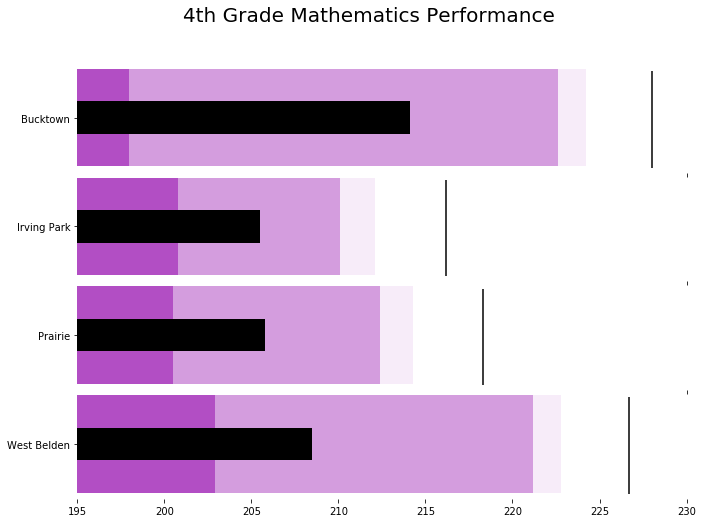

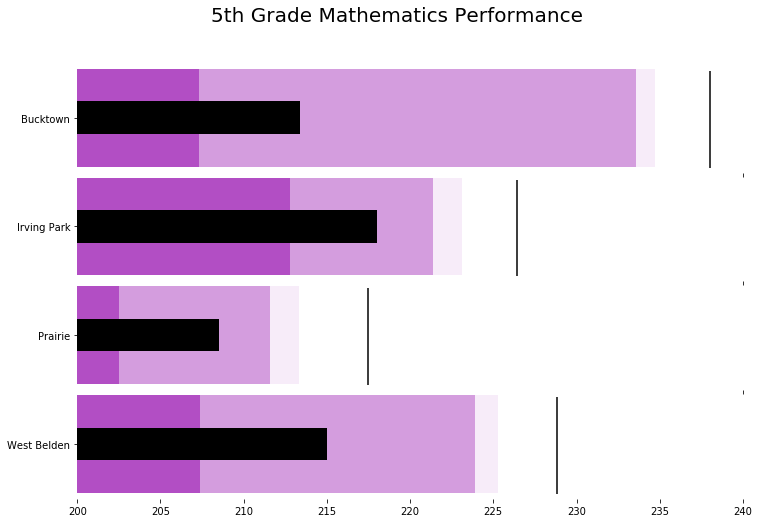

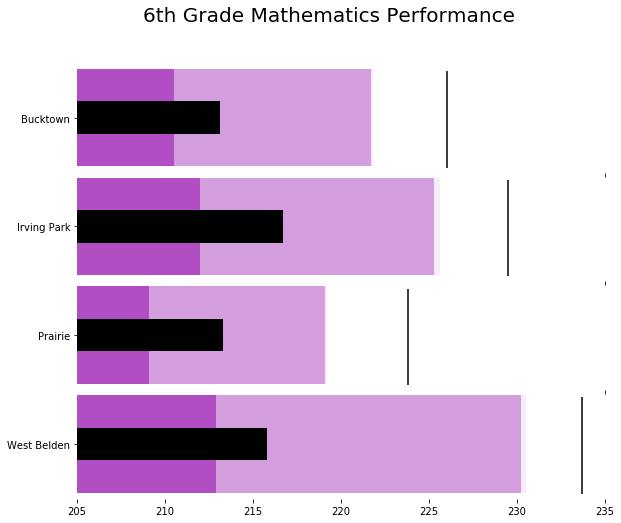

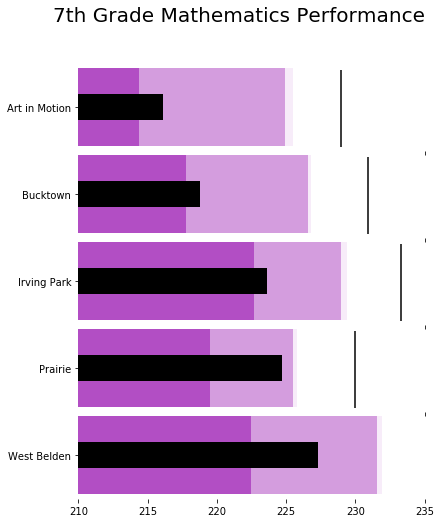

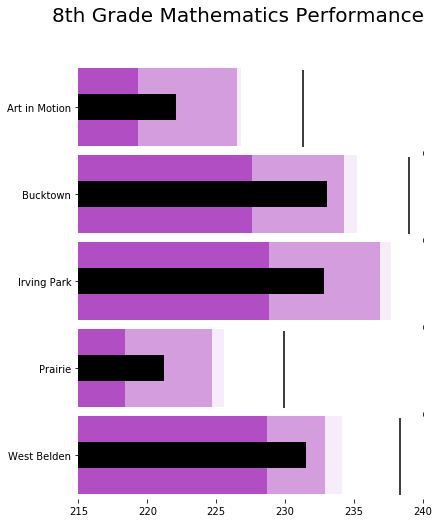

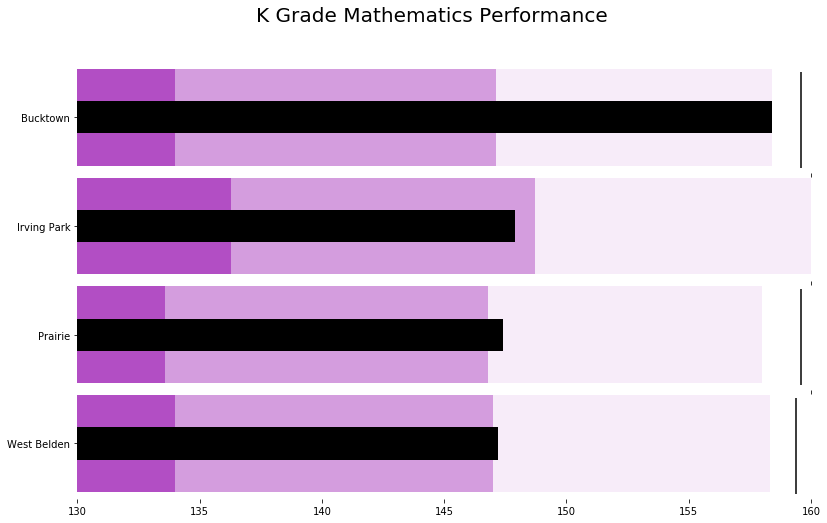

In [43]:
slice_data(gmath, sub='Mathematics')

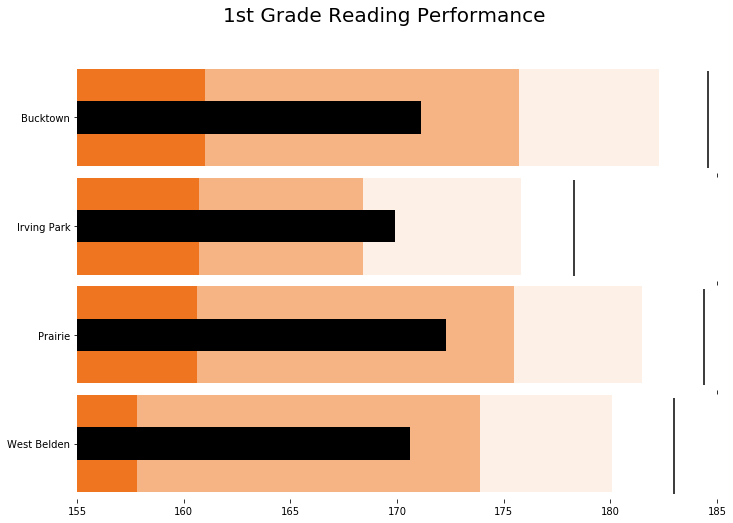

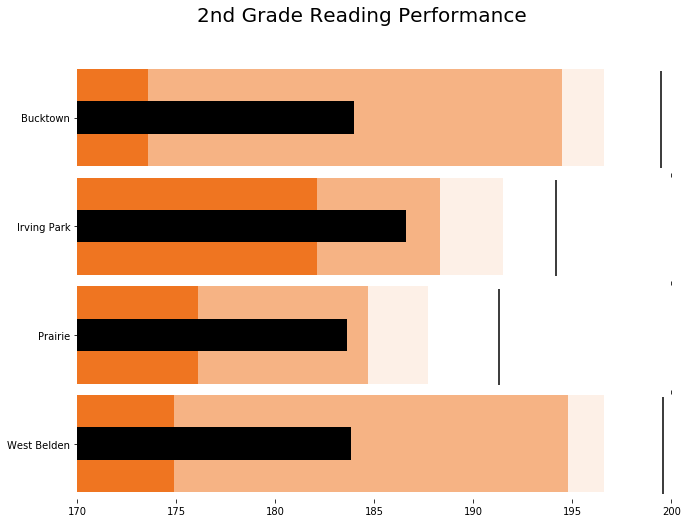

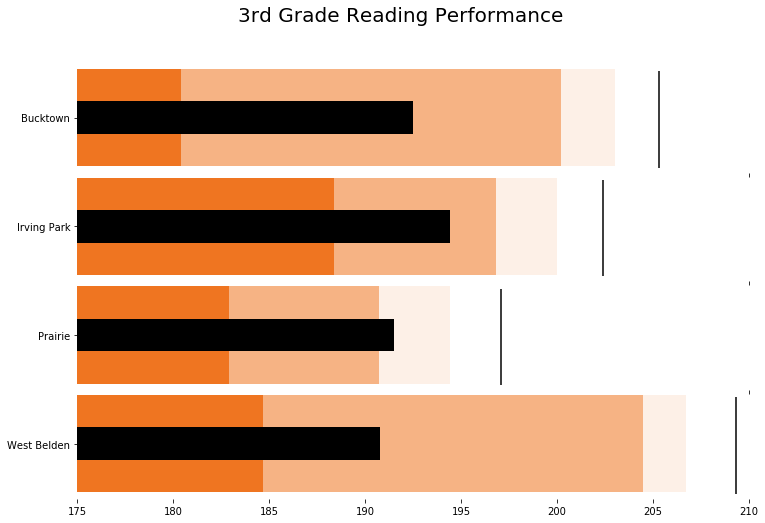

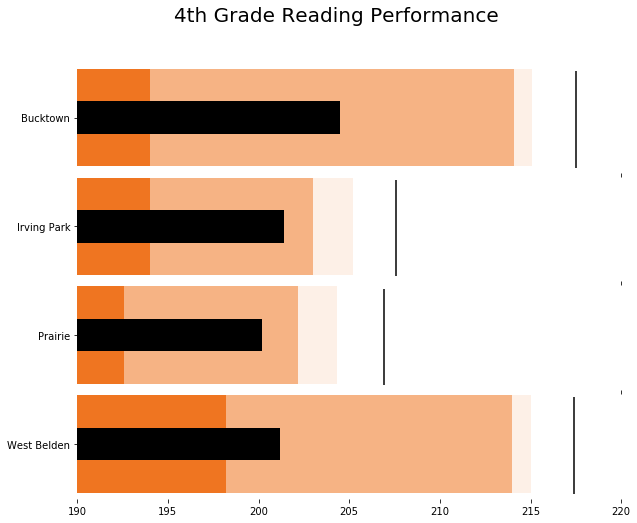

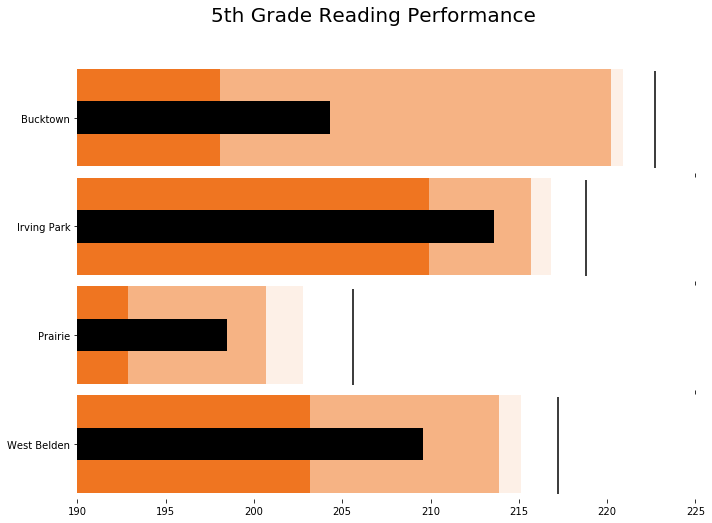

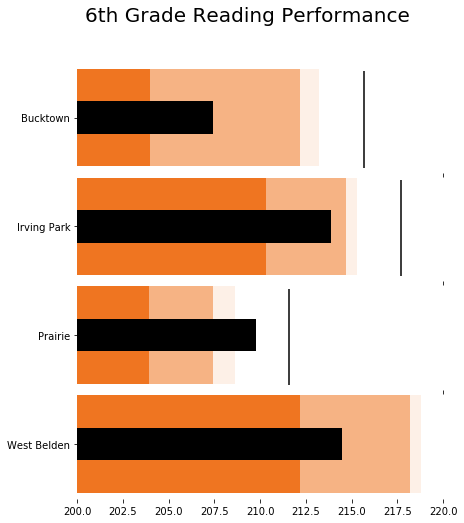

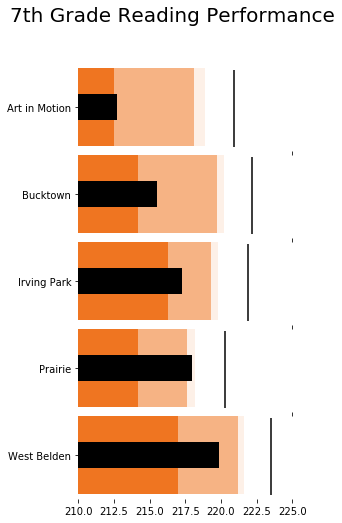

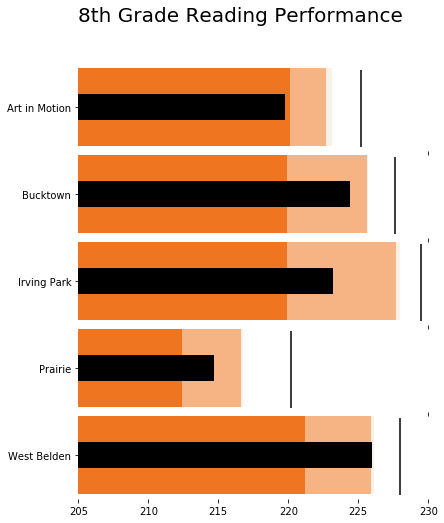

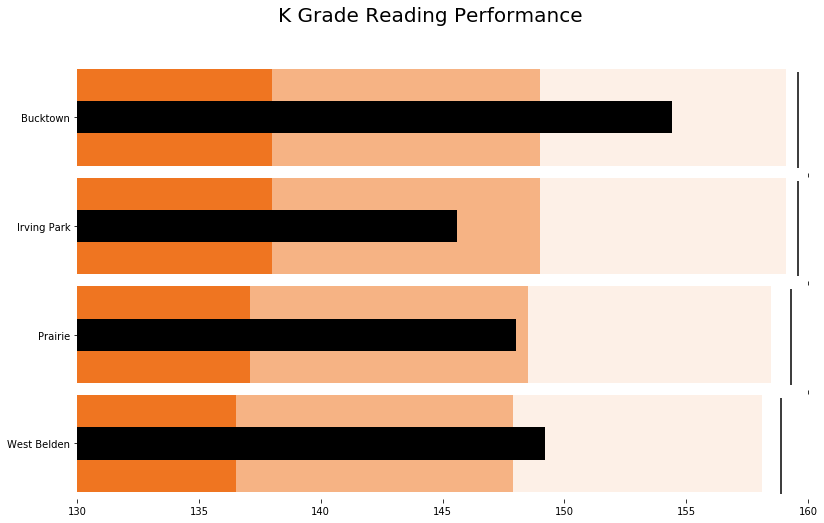

In [44]:
slice_data(gread)